In [2]:
from time import time
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
from PIL import Image
from sklearn.ensemble import RandomForestClassifier

In [14]:
from sklearn.datasets import fetch_lfw_pairs

lfw_dataset_train = fetch_lfw_pairs(subset='train', resize=0.4, color=True)
lfw_dataset_test = fetch_lfw_pairs(subset='test',resize=0.4, color=True)

In [15]:
X_train = lfw_dataset_train.data
y_train = lfw_dataset_train.target

X_test = lfw_dataset_test.data
y_test = lfw_dataset_test.target

In [16]:
cnn_train_data = []
cnn_train_data_1 = []
cnn_train_data_2 = []
for images_paris in lfw_dataset_train['pairs']:
    image1 = images_paris[0]
    image2 = images_paris[1]
    # Stack the two images along the channel axis to create a single image 
    # with dimensions (32, 32, 6)
    combined_image = np.concatenate((image1, image2), axis=0)
    # combined_image = combined_image[:, :, :3]
    cnn_train_data_1.append(image1)
    cnn_train_data_2.append(image2)
    cnn_train_data.append(combined_image)
cnn_train_data  = np.stack(cnn_train_data, axis=0)
cnn_train_data_1  = np.stack(cnn_train_data_1, axis=0)
cnn_train_data_2  = np.stack(cnn_train_data_2, axis=0)

cnn_test_data = []
cnn_test_data_1 = []
cnn_test_data_2 = []
for images_paris in lfw_dataset_test['pairs']:
    image1 = images_paris[0]
    image2 = images_paris[1]
    # Stack the two images along the channel axis to create a single image 
    # with dimensions (32, 32, 6)
    combined_image = np.concatenate((image1, image2), axis=0)
    # combined_image = combined_image[:, :, :3]
    cnn_test_data_1.append(image1)
    cnn_test_data_2.append(image2)
    cnn_test_data.append(combined_image)
cnn_test_data  = np.stack(cnn_test_data, axis=0)
cnn_test_data_1  = np.stack(cnn_test_data_1, axis=0)
cnn_test_data_2  = np.stack(cnn_test_data_2, axis=0)

In [17]:
# ### passing the single image to the function to check the result
# X_train_1 = []
# X_train_2 = []
# for image in cnn_train_data_1:
#     X_train_1.append(image.flatten())

# X_train_1 = np.array(X_train_1)

# for image in cnn_train_data_2:
#     X_train_2.append(image.flatten())
# X_train_2 = np.array(X_train_2)

In [26]:
# %load ../../python_script/feature_extraction
import cv2
import numpy as np
from skimage import data
from skimage.feature import hog
from skimage import data, exposure
from skimage.color import label2rgb
from skimage.transform import rotate
from skimage.feature import local_binary_pattern


def histogram_oriented_gradients(image):
    # Example usage on a single image
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualize=True)

    # Visualize the HOG image
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    return hog_image_rescaled
  
def scale_invariant_feature_transform(image):
    
    # Convert the image depth to CV_8U
    image8bit = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    
    #reading image
    gray1 = cv2.cvtColor(image8bit, cv2.COLOR_BGR2GRAY)
    
    #keypoints
    #keypoints``
    sift = cv2.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(gray1, None)

    img_1 = cv2.drawKeypoints(gray1,keypoints_1,image)
    return img_1
    
def local_binary_patterns(image):
    
    # settings for LBP
    radius = 3
    n_points = 8 * radius
    
    # Convert the image depth to CV_8U
    image8bit = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

    # Convert the array to grayscale and reshape it to (height, width)
    gray1 = cv2.cvtColor(image8bit, cv2.COLOR_BGR2GRAY)

    lbp = local_binary_pattern(gray1, n_points, radius, method = "uniform")

    return lbp

### 1. Preparing the scale_invariant_feature_transform data

In [20]:
### passing the single image to the function to check the result
image_rescaled = {}
flattend_arr = []
sift_image = []
for image in cnn_train_data_1:
    arr_2d = scale_invariant_feature_transform(image)
    sift_image.append(arr_2d)
    flattend_arr.append(arr_2d.flatten())

image_rescaled["sift_data_1"] = np.array(flattend_arr)
image_rescaled["sift_image_1"] = np.array(sift_image)


### passing the single image to the function to check the result
flattend_arr = []
sift_image = []
for image in cnn_train_data_2:
    arr_2d = scale_invariant_feature_transform(image)
    sift_image.append(arr_2d)
    flattend_arr.append(arr_2d.flatten())

image_rescaled["sift_data_2"] = np.array(flattend_arr)
image_rescaled["sift_image_2"] = np.array(sift_image)

In [39]:
### passing the single image to the function to check the result
flattend_arr = []
sift_image = []
for image in cnn_test_data_1:
    arr_2d = scale_invariant_feature_transform(image)
    sift_image.append(arr_2d)
    flattend_arr.append(arr_2d.flatten())

image_rescaled["sift_data_test_1"] = np.array(flattend_arr)
image_rescaled["sift_image_test_1"] = np.array(sift_image)


### passing the single image to the function to check the result
flattend_arr = []
sift_image = []
for image in cnn_test_data_2:
    arr_2d = scale_invariant_feature_transform(image)
    sift_image.append(arr_2d)
    flattend_arr.append(arr_2d.flatten())

image_rescaled["sift_data_test_2"] = np.array(flattend_arr)
image_rescaled["sift_image_test_2"] = np.array(sift_image)

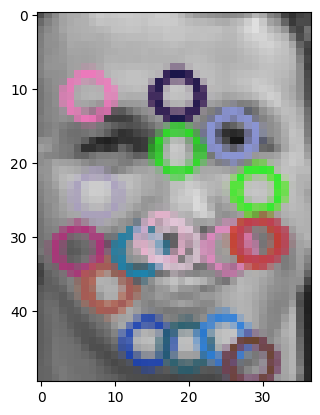

In [21]:
plt.imshow(image_rescaled["sift_image_1"][1])

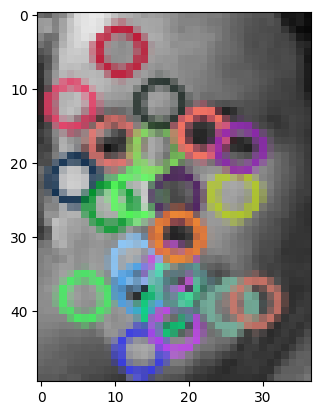

In [22]:
plt.imshow(image_rescaled["sift_image_2"][1])

### 2. Preparing the histogram_oriented_gradients of sift_data

In [28]:
import cv2

In [31]:
### passing the single image to the function to check the result
flattend_arr = []
hog_image = []
for image in cnn_train_data_1:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    arr_2d = histogram_oriented_gradients(gray_image)
    hog_image.append(arr_2d)
    flattend_arr.append(arr_2d.flatten())

image_rescaled["hog_data_1"] = np.array(flattend_arr)
image_rescaled["hog_image_1"] = np.array(hog_image)


### passing the single image to the function to check the result
flattend_arr = []
hog_image = []
for image in cnn_train_data_2:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    arr_2d = histogram_oriented_gradients(gray_image)
    hog_image.append(arr_2d)
    flattend_arr.append(arr_2d.flatten())

image_rescaled["hog_data_2"] = np.array(flattend_arr)
image_rescaled["hog_image_2"] = np.array(hog_image)

In [40]:
### passing the single image to the function to check the result
flattend_arr = []
hog_image = []
for image in cnn_test_data_1:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    arr_2d = histogram_oriented_gradients(gray_image)
    hog_image.append(arr_2d)
    flattend_arr.append(arr_2d.flatten())

image_rescaled["hog_data_test_1"] = np.array(flattend_arr)
image_rescaled["hog_image_test_1"] = np.array(hog_image)


### passing the single image to the function to check the result
flattend_arr = []
hog_image = []
for image in cnn_test_data_2:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    arr_2d = histogram_oriented_gradients(gray_image)
    hog_image.append(arr_2d)
    flattend_arr.append(arr_2d.flatten())

image_rescaled["hog_data_test_2"] = np.array(flattend_arr)
image_rescaled["hog_image_test_2"] = np.array(hog_image)

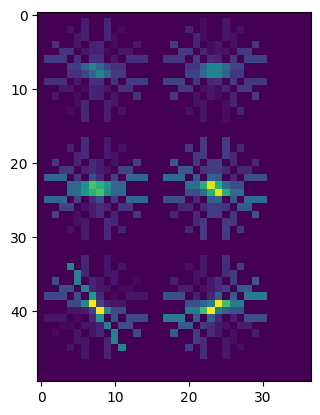

In [32]:
plt.imshow(image_rescaled["hog_image_1"][1])

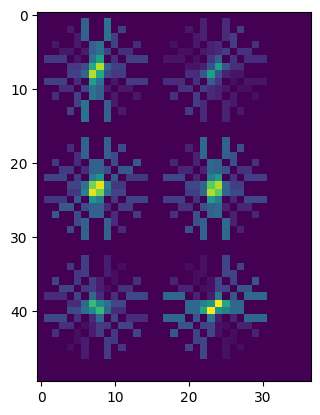

In [33]:
plt.imshow(image_rescaled["hog_image_2"][1])

### 3. Preparing the local_binary_patterns data

In [34]:
### passing the single image to the function to check the result
flattend_arr = []
lbp_image = []
for image in cnn_train_data_1:
    arr_2d = local_binary_patterns(image)
    lbp_image.append(arr_2d)
    flattend_arr.append(arr_2d.flatten())

image_rescaled["lbp_data_1"] = np.array(flattend_arr)
image_rescaled["lbp_image_1"] = np.array(lbp_image)


### passing the single image to the function to check the result
flattend_arr = []
lbp_image = []
for image in cnn_train_data_2:
    arr_2d = local_binary_patterns(image)
    lbp_image.append(arr_2d)
    flattend_arr.append(arr_2d.flatten())

image_rescaled["lbp_data_2"] = np.array(flattend_arr)
image_rescaled["lbp_image_2"] = np.array(lbp_image)

In [41]:
### passing the single image to the function to check the result
flattend_arr = []
lbp_image = []
for image in cnn_test_data_1:
    arr_2d = local_binary_patterns(image)
    lbp_image.append(arr_2d)
    flattend_arr.append(arr_2d.flatten())

image_rescaled["lbp_data_test_1"] = np.array(flattend_arr)
image_rescaled["lbp_image_test_1"] = np.array(lbp_image)


### passing the single image to the function to check the result
flattend_arr = []
lbp_image = []
for image in cnn_test_data_2:
    arr_2d = local_binary_patterns(image)
    lbp_image.append(arr_2d)
    flattend_arr.append(arr_2d.flatten())

image_rescaled["lbp_data_test_2"] = np.array(flattend_arr)
image_rescaled["lbp_image_test_2"] = np.array(lbp_image)

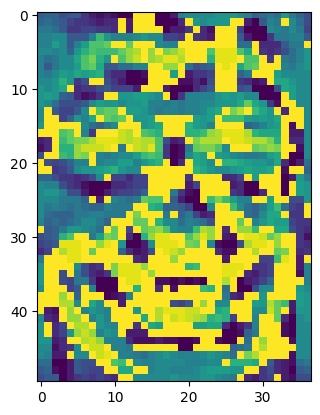

In [35]:
plt.imshow(image_rescaled["lbp_image_1"][1])

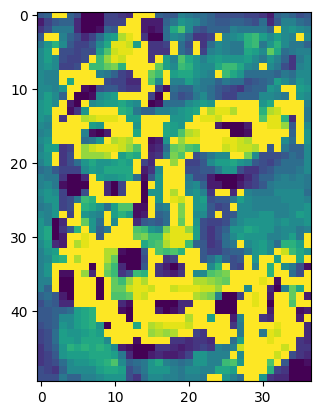

In [36]:
plt.imshow(image_rescaled["lbp_image_2"][1])

### 4. Implementing poc on lbp/sift/hog

In [42]:
image_rescaled.keys()

dict_keys(['sift_data_1', 'sift_image_1', 'sift_data_2', 'sift_image_2', 'hog_data_1', 'hog_image_1', 'hog_data_2', 'hog_image_2', 'lbp_data_1', 'lbp_image_1', 'lbp_data_2', 'lbp_image_2', 'sift_data_test_1', 'sift_image_test_1', 'sift_data_test_2', 'sift_image_test_2', 'hog_data_test_1', 'hog_image_test_1', 'hog_data_test_2', 'hog_image_test_2', 'lbp_data_test_1', 'lbp_image_test_1', 'lbp_data_test_2', 'lbp_image_test_2'])

In [48]:
image_rescaled['lbp_image_test_1'][0].shape, image_rescaled['lbp_image_1'][0].shape

((50, 37), (50, 37))

In [50]:
image_rescaled['lbp_image_test_2'][0].shape, image_rescaled['lbp_image_2'][0].shape

((50, 37), (50, 37))

In [49]:
def pca_implementation(X_train, X_test):
    # Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
    # dataset): unsupervised feature extraction / dimensionality reduction
    n_components = 150

    print("Extracting the top %d eigenfaces from %d faces"
          % (n_components, X_train.shape[0]))
    t0 = time()
    pca = PCA(n_components=n_components, svd_solver='randomized',
              whiten=True).fit(X_train)
    print("done in %0.3fs" % (time() - t0))

    eigenfaces = pca.components_.reshape((n_components, 50, 37))

    print("Projecting the input data on the eigenfaces orthonormal basis")
    t0 = time()
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print("done in %0.3fs" % (time() - t0))
    return X_train_pca, X_test_pca

#### 4.1 LBP PCA Data

In [52]:
X_train_pca_lbp_1, X_test_pca_lbp_1 = pca_implementation(image_rescaled['lbp_data_1'], image_rescaled['lbp_data_test_1'])

Extracting the top 150 eigenfaces from 2200 faces
done in 1.898s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.087s


In [53]:
X_train_pca_lbp_2, X_test_pca_lbp_2 = pca_implementation(image_rescaled['lbp_data_2'], image_rescaled['lbp_data_test_2'])

Extracting the top 150 eigenfaces from 2200 faces
done in 2.184s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.106s


In [55]:
X_train_pca_lbp = np.hstack((X_train_pca_lbp_1,X_train_pca_lbp_2))
X_test_pca_lbp = np.hstack((X_test_pca_lbp_1,X_test_pca_lbp_2))

print(f"shape of train:: {X_train_pca_lbp.shape} and test:: {X_test_pca_lbp.shape} on lbp ")

shape of train:: (2200, 300) and test:: (1000, 300) on lbp 


#### 4.2 HOG PCA DATA

In [58]:
image_rescaled.keys()

dict_keys(['sift_data_1', 'sift_image_1', 'sift_data_2', 'sift_image_2', 'hog_data_1', 'hog_image_1', 'hog_data_2', 'hog_image_2', 'lbp_data_1', 'lbp_image_1', 'lbp_data_2', 'lbp_image_2', 'sift_data_test_1', 'sift_image_test_1', 'sift_data_test_2', 'sift_image_test_2', 'hog_data_test_1', 'hog_image_test_1', 'hog_data_test_2', 'hog_image_test_2', 'lbp_data_test_1', 'lbp_image_test_1', 'lbp_data_test_2', 'lbp_image_test_2'])

In [59]:
X_train_pca_hog_1, X_test_pca_hog_1 = pca_implementation(image_rescaled['hog_data_1'], image_rescaled['hog_data_test_1'])
X_train_pca_hog_2, X_test_pca_hog_2 = pca_implementation(image_rescaled['hog_data_2'], image_rescaled['hog_data_test_2'])

X_train_pca_hog = np.hstack((X_train_pca_hog_1,X_train_pca_hog_2))
X_test_pca_hog = np.hstack((X_test_pca_hog_1,X_test_pca_hog_2))

print(f"shape of train:: {X_train_pca_hog.shape} and test:: {X_test_pca_hog.shape} on lbp ")

Extracting the top 150 eigenfaces from 2200 faces
done in 0.830s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.035s
Extracting the top 150 eigenfaces from 2200 faces
done in 0.640s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.038s
shape of train:: (2200, 300) and test:: (1000, 300) on lbp 


#### 4.3 SIFT PCA DATA

In [73]:
def pca_implementation_3d(X_train, X_test):
    # Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
    # dataset): unsupervised feature extraction / dimensionality reduction
    n_components = 150

    print("Extracting the top %d eigenfaces from %d faces"
          % (n_components, X_train.shape[0]))
    t0 = time()
    pca = PCA(n_components=n_components, svd_solver='randomized',
              whiten=True).fit(X_train)
    print("done in %0.3fs" % (time() - t0))

    eigenfaces = pca.components_.reshape((n_components, 50, 37, 3))

    print("Projecting the input data on the eigenfaces orthonormal basis")
    t0 = time()
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print("done in %0.3fs" % (time() - t0))
    return X_train_pca, X_test_pca

In [74]:
X_train_pca_sift_1, X_test_pca_sift_1 = pca_implementation_3d(image_rescaled['sift_data_1'], image_rescaled['sift_data_test_1'])
X_train_pca_sift_2, X_test_pca_sift_2 = pca_implementation_3d(image_rescaled['sift_data_2'], image_rescaled['sift_data_test_2'])

X_train_pca_sift = np.hstack((X_train_pca_sift_1,X_train_pca_sift_2))
X_test_pca_sift = np.hstack((X_test_pca_sift_1,X_test_pca_sift_2))

print(f"shape of train:: {X_train_pca_sift.shape} and test:: {X_test_pca_sift.shape} on lbp ")

Extracting the top 150 eigenfaces from 2200 faces
done in 3.332s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.366s
Extracting the top 150 eigenfaces from 2200 faces
done in 3.162s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.259s
shape of train:: (2200, 300) and test:: (1000, 300) on lbp 


### 5. XGBOOST

#### 5.1 Using SIFT PCA and LBP PCA data 

In [76]:
X_train = np.hstack((X_train_pca_sift, X_train_pca_lbp))
X_test = np.hstack((X_test_pca_sift, X_test_pca_lbp))

In [77]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [80]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
y_pred = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.497

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

target = lfw_dataset_test.target
target_names = lfw_dataset_test.target_names


print(classification_report(y_pred, y_test, target_names=target_names))

                   precision    recall  f1-score   support

Different persons       0.39      0.50      0.43       389
      Same person       0.61      0.50      0.55       611

         accuracy                           0.50      1000
        macro avg       0.50      0.50      0.49      1000
     weighted avg       0.52      0.50      0.50      1000



#### 5.2 Using HOG PCA and LBP PCA data

In [82]:
X_train = np.hstack((X_train_pca_hog, X_train_pca_lbp))
X_test = np.hstack((X_test_pca_hog, X_test_pca_lbp))

import xgboost as xgb
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
y_pred = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.497

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

target = lfw_dataset_test.target
target_names = lfw_dataset_test.target_names


print(classification_report(y_pred, y_test, target_names=target_names))

                   precision    recall  f1-score   support

Different persons       0.40      0.53      0.46       376
      Same person       0.65      0.52      0.58       624

         accuracy                           0.53      1000
        macro avg       0.53      0.53      0.52      1000
     weighted avg       0.56      0.53      0.53      1000



### 5.3 Using HOG PCA and SIFT PCA data

In [84]:
X_train = np.hstack((X_train_pca_hog, X_train_pca_sift))
X_test = np.hstack((X_test_pca_hog, X_test_pca_sift))

import xgboost as xgb
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
y_pred = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.497

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

target = lfw_dataset_test.target
target_names = lfw_dataset_test.target_names


print(classification_report(y_pred, y_test, target_names=target_names))

                   precision    recall  f1-score   support

Different persons       0.48      0.51      0.50       469
      Same person       0.54      0.51      0.53       531

         accuracy                           0.51      1000
        macro avg       0.51      0.51      0.51      1000
     weighted avg       0.51      0.51      0.51      1000

